<a href="https://colab.research.google.com/github/Eden-Green12/Just_Machine_Learning_Things/blob/main/ML_Project_Cardekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

In [10]:
# step 1 - create a new enviornment 
!pip3 install virtualenv
!virtualenv Manasi 

created virtual environment CPython3.7.10.final.0-64 in 146ms
  creator CPython3Posix(dest=/content/Manasi/Manasi, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==21.1.2, setuptools==57.0.0, wheel==0.36.2
  activators BashActivator,CShellActivator,FishActivator,PowerShellActivator,PythonActivator,XonshActivator


In [11]:
#step 2 : activate the environment 
!source Manasi/bin/activate

In [12]:
import os 
os.chdir('/content/Manasi')

In [13]:
!ls

 bin  'car data.csv'   lib   Manasi   pyvenv.cfg


In [14]:
#upload the data in the environment 

In [15]:
import pandas as pd 

In [16]:
df = pd.read_csv('/content/Manasi/car data.csv')

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
df.shape

(301, 9)

In [19]:
# We have to calcualte the SELLING PRICE hence Selling Price becomes the y 
# To find the unique values of the columns that have categorical data 

print('Seller_Type : ', df['Seller_Type'].unique())
print('Fuel_Type : ', df['Fuel_Type'].unique())
print('Transmission : ', df['Transmission'].unique())
print('Owner : ', df['Owner'].unique())

Seller_Type :  ['Dealer' 'Individual']
Fuel_Type :  ['Petrol' 'Diesel' 'CNG']
Transmission :  ['Manual' 'Automatic']
Owner :  [0 1 3]


In [20]:
#Check missing values 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [21]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [22]:
df.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [23]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [24]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
# We are going to find the number of years it has been since the Year column , since the number of years plays a big role in depreciation 
final_dataset['Current_Year']=2021

In [26]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [27]:
final_dataset['No. of Years']= final_dataset['Current_Year'] - final_dataset['Year']

In [28]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No. of Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2021,5
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2021,6
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2021,12
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2021,4


In [29]:
final_dataset.drop(['Year','Current_Year'],axis = 1 , inplace =True)

In [30]:
final_dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'No. of Years'],
      dtype='object')

In [31]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [32]:
# Convert the categorical data into something else to aid in the analysis 
final_dataset=pd.get_dummies(final_dataset , drop_first = True) # drop_first is set to True so that it deletes the initial columns to avoid the dummy trap

In [33]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No. of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [34]:
import seaborn as sns 

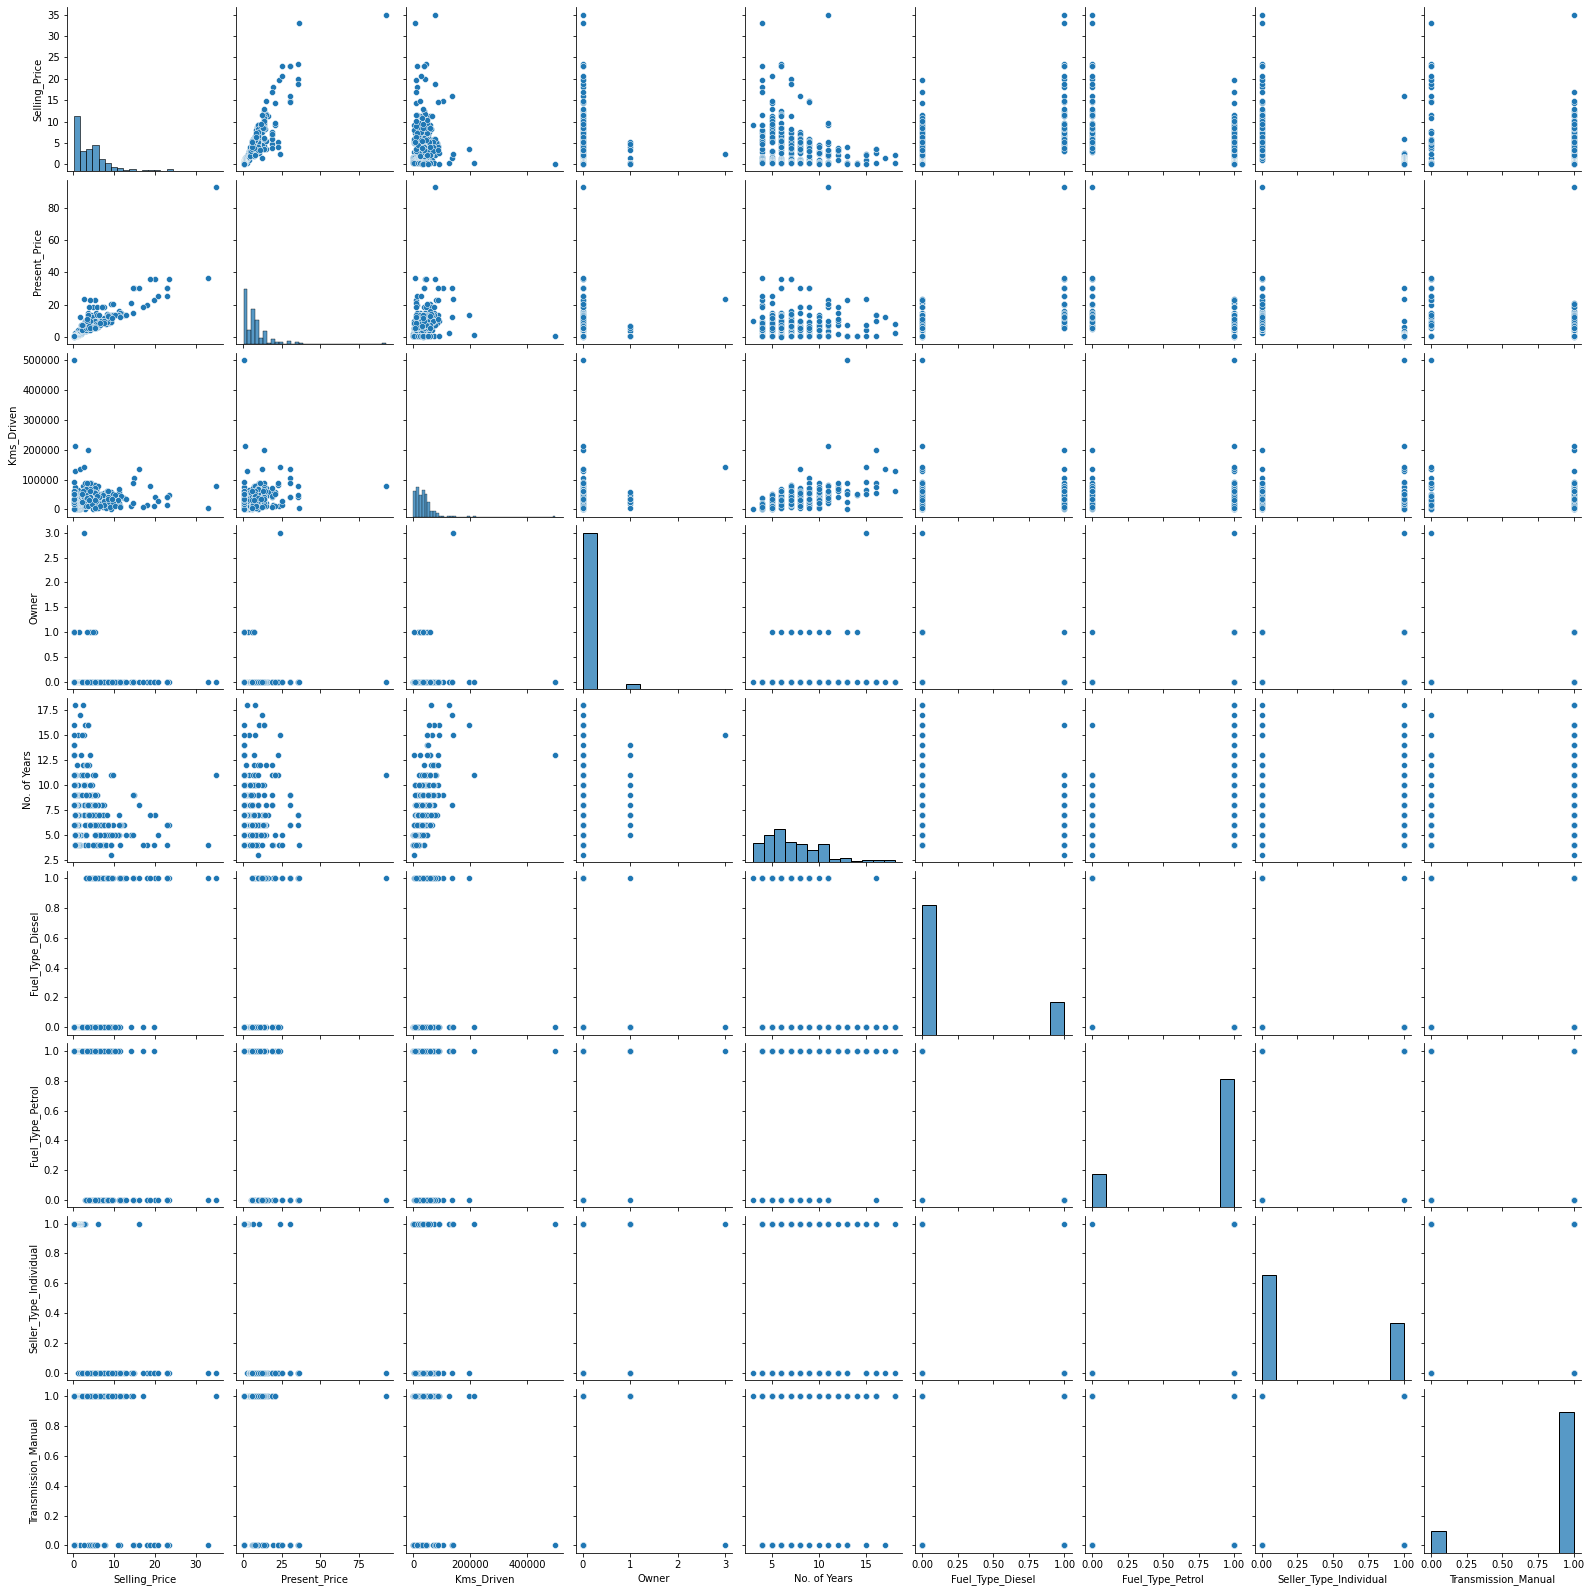

In [35]:
sns.pairplot(final_dataset)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline 
# important to write this as if it is absent it wont display the matplotlib plots 

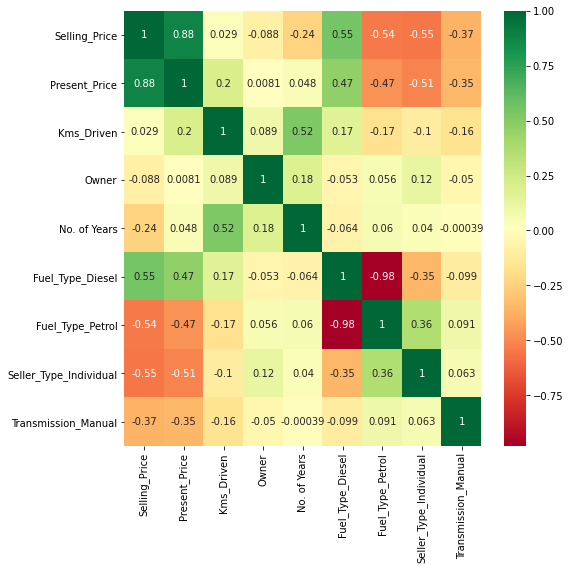

In [37]:
corrmat = final_dataset.corr()
top_corr_features= corrmat.index
plt.figure(figsize = (8,8))
# Plot heatmap 
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

#if you have large number of features then you can write a condition saying if correlation is higher than .8 then display 

In [38]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No. of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [39]:
# Dividing the dataset into independant and dependant features 
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [40]:
X.head()

,Present_Price,Kms_Driven,Owner,No. of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [41]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [42]:
## Feature importance - used to understand which features are important 
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [43]:
print(model.feature_importances_)

[0.38586949 0.03915423 0.00084298 0.07864866 0.22497125 0.01282272
 0.12192069 0.13576999]


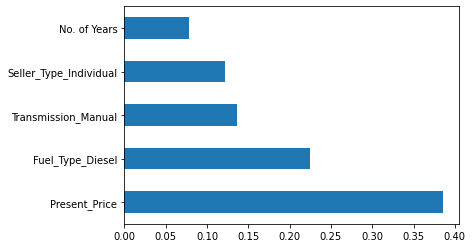

In [44]:
feat_imp = pd.Series(model.feature_importances_ , index = X.columns)
#feat_imp.nlargest(5).plot(kind='barh') 
# nlargest = takes the top five features 
#feat_imp.plot(kind='barh') 
feat_imp.nlargest().plot(kind='barh') 
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size =0.2)

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [47]:
## Hyperparameters : 
import numpy as np 
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200 , num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [48]:
# Number of Trees in random Forest : 
n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200 , num = 12 )]
# Number of features to consider at every split 
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree 
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum number of samples required at each leaf node 
min_samples_leaf = [1,2,5,10]

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
random_grid  = {'n_estimators': n_estimators , 
                'max_features': max_features ,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_split':min_samples_leaf , 
                }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [1, 2, 5, 10]}


In [51]:
# Use the random grid to search for best hyperparameters 
# First create the base model to tune 
rf = RandomForestRegressor()

In [52]:
rf_random = RandomizedSearchCV(estimator=rf , param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10 , cv = 5 , verbose =2 , random_state= 42 , n_jobs=1)

In [53]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 
[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 
[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 
[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=1100, min_samples_split=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=2, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=2, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=2, max_fea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=700, min_samples_split=2, max_features=auto,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [54]:
predictions = rf_random.predict(X_test)

In [55]:
predictions

array([ 9.26181429,  5.32021429,  4.93685714, 10.85308571,  3.0315    ,
        0.55572857,  0.42271429,  6.72607143,  5.04935714,  5.20564286,
        7.36928571,  9.96105714,  1.74028571,  4.54371429,  1.42807143,
        7.1111    ,  2.43114286,  8.19001429,  4.85421429,  8.66585714,
       10.77105714,  2.97892857,  2.7093    , 12.30477143,  5.39608571,
        0.66551429,  7.18354286, 10.26971429,  7.78654286,  3.55428571,
        1.62171429,  0.80961429,  4.7067    ,  5.32228571,  2.93585714,
        0.77121429,  2.41817143,  4.91071429,  0.45524286,  0.41895714,
       11.59564286,  2.42928571,  4.55914286,  5.87271429,  0.44432857,
        0.12984286,  2.83588571, 22.0877    ,  6.71014286,  5.79014286,
        5.1774    ,  0.59615714,  6.13084286,  5.33267143, 14.8484    ,
        0.44354286,  0.71525714,  2.741     , 20.38312857,  0.41842857,
        0.6312    ])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


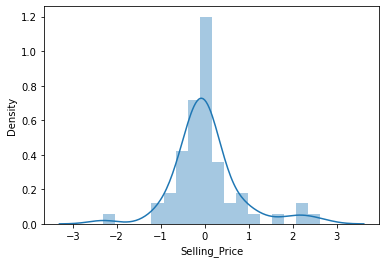

In [56]:
sns.distplot(y_test-predictions)

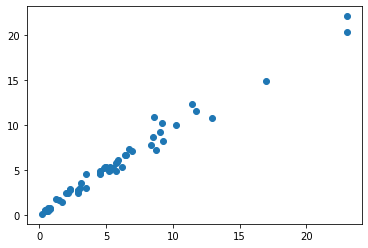

In [57]:
plt.scatter(y_test,predictions)

### **Deployment**

In [58]:
import pickle 
# open a file , where you want to store the data 
file = open('random_forest_model.pkl','wb')
# dump the information to that file 
pickle.dump(rf_random,file)

In [59]:
! pip freeze requirements.txt 

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.2
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.2
catalogue==1.0.0
certifi==2021.5.30
cffi==1.14.5
cftime==1.5.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==9.1.0
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.23
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distlib==0.3.2
distributed=